**Project Check-in 3**

In [7]:
%pip install scikit-lego
%pip install seaborn
%pip install nbstripout
%nbstripout --install

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
UsageError: Line magic function `%nbstripout` not found.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, precision_recall_curve
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


df = pd.read_csv("./dataset.csv")


1. We chose explicit, as it is a binary response variable, and thus is suitable for a classification problem.

2. We chose "Speechiness" as our predictor because we thought it might indicate whether or not a track was rap, which generally has more explicit lyrics.

3. See below.

In [19]:

# Step 1: Clean Data
# Remove duplicates
df_cleaned = df.drop_duplicates()

# Keep only 'speechiness' and 'explicit' columns
df_filtered = df_cleaned[['speechiness', 'explicit']]

# Step 2: Define Predictor and Response
X = df_filtered[['speechiness']] # predictor
y = df_filtered['explicit']     # binary response

# Split data into training and testing sets (optional, here we'll use all data for training)
# 60% train, 20% test, 20% validation
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, train_size=0.6, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X, y, train_size=0.5, random_state=42)

# Step 3: Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred = log_reg.predict(X_train)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
prediction_error = 1 - accuracy
TPR = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])  # True Positive Rate
TNR = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # True Negative Rate

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("Prediction Accuracy:", accuracy)
print("Prediction Error:", prediction_error)
print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)


Confusion Matrix:
 [[62242   278]
 [ 5526   354]]
Prediction Accuracy: 0.9151461988304094
Prediction Error: 0.08485380116959063
True Positive Rate (TPR): 0.06020408163265306
True Negative Rate (TNR): 0.9955534229046705


#4 See below

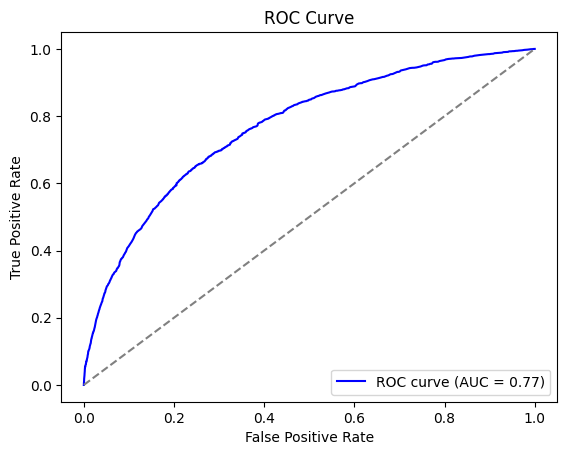

5-Fold Cross-Validation AUC scores: [0.76429576 0.76585694 0.776986   0.77223464 0.7624112 ]
Mean AUC across folds: 0.7683569080800654
5-Fold Cross-Validation Accuracy scores: [0.91710526 0.91587719 0.91754386 0.91675439 0.91754386]
Mean Accuracy across folds: 0.9169649122807018


In [20]:
# Perform 5-fold cross-validation on the validation set for AUC and accuracy
cv = StratifiedKFold(n_splits=5)
auc_scores = cross_val_score(log_reg, X_val, y_val, cv=cv, scoring='roc_auc')
accuracy_scores = cross_val_score(log_reg, X_val, y_val, cv=cv, scoring='accuracy')

# Train model on training data for ROC curve
log_reg.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_probs = log_reg.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC on the validation set
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
roc_auc = roc_auc_score(y_val, y_val_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print cross-validated AUC and accuracy for each fold
print("5-Fold Cross-Validation AUC scores:", auc_scores)
print("Mean AUC across folds:", np.mean(auc_scores))
print("5-Fold Cross-Validation Accuracy scores:", accuracy_scores)
print("Mean Accuracy across folds:", np.mean(accuracy_scores))


#5
In #4 we used 0.5 as the threshold since its a common sense hyperparameter value in this case. We also investigated the optimal threshold to maximize F1 score, which would be ~0.09 due to a class imbalance (far more non-explicit songs). To mitigate this, we could weight the classes appropriately.

In [23]:
# Precision-recall curve gives thresholds, precision, and recall
y_prob = log_reg.predict_proba(X_train)[:, 1]
precisions, recalls, thresholds_pr = precision_recall_curve(y_train, y_prob)

# Calculate F1 score for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the threshold that maximizes the F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]

# Step 4: Use optimal threshold for predictions
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Print the results
print("Optimal Threshold (F1):", optimal_threshold)
print("F1 Score at Optimal Threshold:", f1_scores[optimal_idx])
print("Accuracy at Optimal Threshold:", accuracy_score(y_train, y_pred_optimal))

Optimal Threshold (F1): 0.09470080813155504
F1 Score at Optimal Threshold: 0.32803970223325063
Accuracy at Optimal Threshold: 0.8416374269005849
